# Playing with Gm/ID 

Peter Kinget 
June 2025

Based on Boris Murmann's script. 

In [21]:
import numpy as np
import scipy.constants as sc
import matplotlib.pyplot as plt
from pygmid import Lookup as lk
%matplotlib widget

In [2]:
choice = 0  #start from 0
devices = ['nfet_03v3', 'pfet_03v3']
fet = lk('./simulation/'+devices[choice]+'.mat')

In [27]:
# sweep variable vectors
w = fet['W']
l = fet['L']
vgs = fet['VGS']
vds = fet['VDS']
vsb = fet['VSB']

In [31]:
print(f'Transistor Width is {w} and Lengths are {l}')


Transistor Width is 5.0 and Lengths are [0.28 0.29 0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   2.   3.  ]


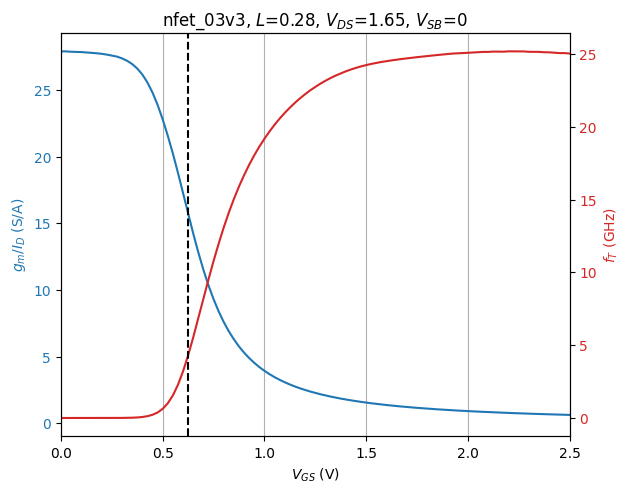

In [4]:
# plot gm/ID and fT versus gate bias
L1 = min(l); VDS1=1.65; VSB1=0
gm_id1 = fet.lookup('GM_ID', L=L1, VDS=VDS1, VSB=VSB1)
ft1 = fet.lookup('GM_CGG', L=L1, VDS=VDS1, VSB=VSB1)/2/np.pi
vt = fet.lookup('VT', L=L1, VGS=0.9, VDS=VDS1, VSB=VSB1)

fig, ax1 = plt.subplots()
ax1.grid(axis='x')
ax1.set_xlabel('$V_{GS}$ (V)')
color = 'tab:blue'
ax1.set_ylabel('$g_m/I_D$ (S/A)', color=color)
ax1.plot(vgs, gm_id1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('$f_T$ (GHz)', color=color)
ax2.plot(vgs, ft1/1e9, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
plt.title(devices[choice]+', $L$='+str(L1)+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.xlim(0, 2.5)
plt.axvline(x=vt, color='k', linestyle='--')
plt.show()

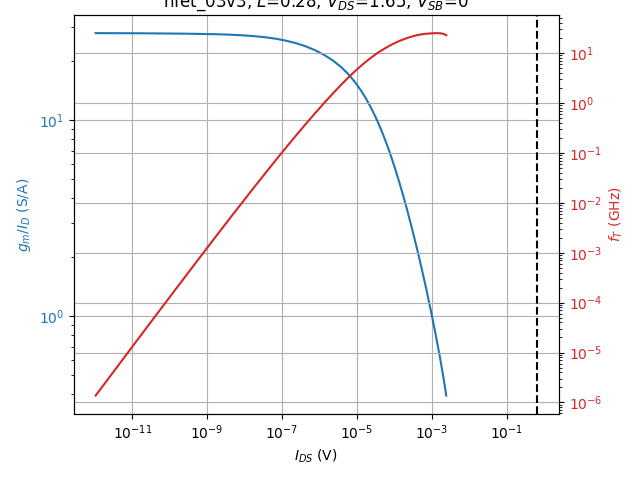

In [40]:
# plot gm/ID and fT versus ID
L1 = min(l); VDS1=1.65; VSB1=0
gm_id1 = fet.lookup('GM_ID', L=L1, VDS=VDS1, VSB=VSB1)
ft1 = fet.lookup('GM_CGG', L=L1, VDS=VDS1, VSB=VSB1)/2/np.pi
vt = fet.lookup('VT', L=L1, VGS=0.9, VDS=VDS1, VSB=VSB1)
ids = fet.lookup('ID', L=L1, VDS=VDS1, VSB=VSB1)

fig, ax1 = plt.subplots()
ax1.grid(axis='x')
ax1.set_xlabel('$I_{DS}$ (V)')
color = 'tab:blue'
ax1.set_ylabel('$g_m/I_D$ (S/A)', color=color)
ax1.loglog(ids, gm_id1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('$f_T$ (GHz)', color=color)
ax2.loglog(ids, ft1/1e9, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid(True)
fig.tight_layout()
plt.title(devices[choice]+', $L$='+str(L1)+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
# plt.xlim(0, 2.5)
plt.axvline(x=vt, color='k', linestyle='--')
plt.show()

2.551020408163265e-07


<>:35: SyntaxWarning: invalid escape sequence '\m'
<>:35: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_1870/3974637089.py:35: SyntaxWarning: invalid escape sequence '\m'
  label = f"$I_0$={I0/1e-6:.2f}$\mu$A"


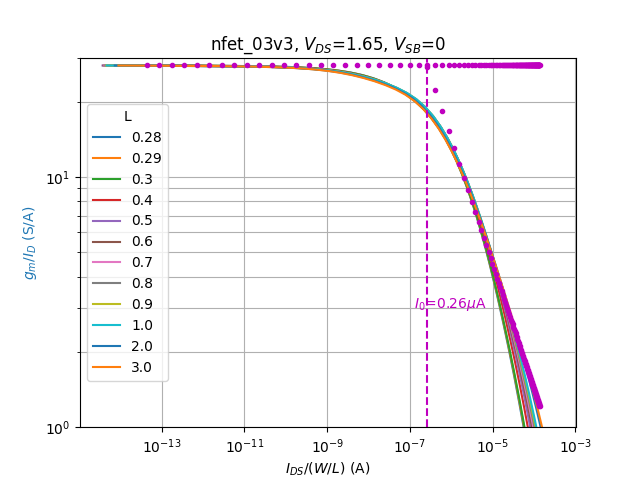

In [117]:
# plot gm/ID versus ID/(W/L)

fig, ax1 = plt.subplots()
ax1.grid(which='both')
ax1.set_xlabel('$I_{DS}/(W/L)$ (A)')
color = 'tab:blue'
ax1.set_ylabel('$g_m/I_D$ (S/A)', color=color)

gm_ids = fet.lookup('GM_ID', L=l, VDS=VDS1, VSB=VSB1)
fts = fet.lookup('GM_CGG', L=l, VDS=VDS1, VSB=VSB1)
ids = fet.lookup('ID', L=l, VDS=VDS1, VSB=VSB1)
ax1.loglog((ids / w * l[:, None]).T, gm_ids.T)
# ax2.semilogx((ids / w * l[:, None]).T, fts.T)

# tangents
# strong inversion
x = (ids / w * l[:, None]).T[:,1]
K_si = 10*np.sqrt(2e-6) # S/A/sqrt(A)
y = K_si/np.sqrt(x) 
ax1.loglog(x,y,'.',color='m')
# weak inversion
K_wi = 28 # S/A
y = K_wi *np.ones(len(x))
ax1.loglog(x,y,'.',color='m')

I0 = (K_si/K_wi)**2
print(I0)
ax1.set_ylim(1, 30)
ax1.legend(loc='center left', title='L', labels=l.tolist())

#ax1.legend(loc='center right', bbox_to_anchor=(1.9, 0.5), title='L', labels=l.tolist())

# fig.tight_layout()
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
label = f"$I_0$={I0/1e-6:.2f}$\mu$A"
ax1.text(I0/2, 3, label, color='m' )
plt.axvline(x=I0, color='m', linestyle='--')
plt.show()

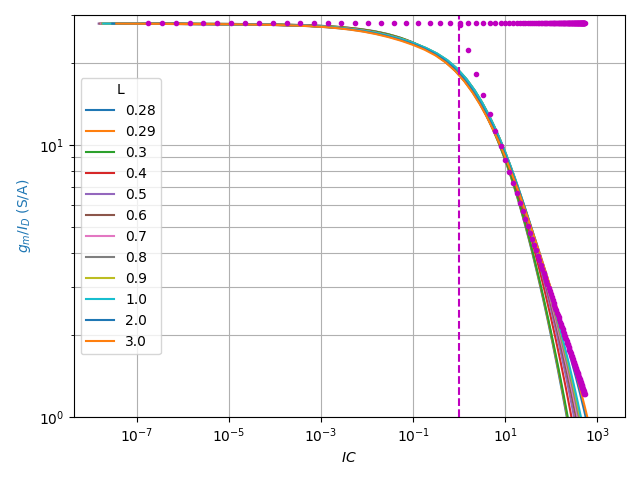

In [114]:
# plot gm/ID versus IC = ID/(W/L)/I0

fig, ax1 = plt.subplots()
ax1.grid(which='both')
ax1.set_xlabel('$IC$')
color = 'tab:blue'
ax1.set_ylabel('$g_m/I_D$ (S/A)', color=color)

gm_ids = fet.lookup('GM_ID', L=l, VDS=VDS1, VSB=VSB1)
fts = fet.lookup('GM_CGG', L=l, VDS=VDS1, VSB=VSB1)
ids = fet.lookup('ID', L=l, VDS=VDS1, VSB=VSB1)
ax1.loglog((ids / I0 / w * l[:, None]).T, gm_ids.T)
# ax2.semilogx((ids / w * l[:, None]).T, fts.T)

# tangents
# strong inversion
x = (ids / I0 / w * l[:, None]).T[:,1]
K_si_0 = K_si/np.sqrt(I0) 
y = K_si_0/np.sqrt(x) 
ax1.loglog(x,y,'.',color='m')
# weak inversion
K_wi = 28 # S/A
y = K_wi *np.ones(len(x))
ax1.loglog(x,y,'.',color='m')
plt.axvline(x=1, color='m', linestyle='--')

ax1.set_ylim(1, 30)
ax1.legend(loc='center left', title='L', labels=l.tolist())

fig.tight_layout()


In [46]:
whos


Variable   Type       Data/Info
-------------------------------
L1         float64    3.0
VDS1       float      1.65
VDS2       float      0.9
VSB1       int        0
VSB2       int        0
ax         Axes       Axes(0.125,0.11;0.775x0.77)
ax1        Axes       Axes(0.125,0.11;0.775x0.77)
ax2        Axes       Axes(0.125,0.11;0.775x0.77)
choice     int        0
color      str        tab:red
devices    list       n=2
fet        Lookup     <pygmid.Lookup.Lookup object at 0xffff3f606780>
fig        Figure     Figure(629.508x472.131)
ft1        ndarray    133: 133 elems, type `float64`, 1064 bytes
ft2        ndarray    12x133: 1596 elems, type `float64`, 12768 bytes
fts        ndarray    12x133: 1596 elems, type `float64`, 12768 bytes
gm_gds2    ndarray    12x133: 1596 elems, type `float64`, 12768 bytes
gm_id1     ndarray    133: 133 elems, type `float64`, 1064 bytes
gm_id2     ndarray    12x133: 1596 elems, type `float64`, 12768 bytes
gm_ids     ndarray    12x133: 1596 elems, type `float

<>:5: SyntaxWarning: invalid escape sequence '\c'
<>:5: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_1870/328843107.py:5: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel('$f_T\cdot g_m/I_D$ (GHz-S/A)')


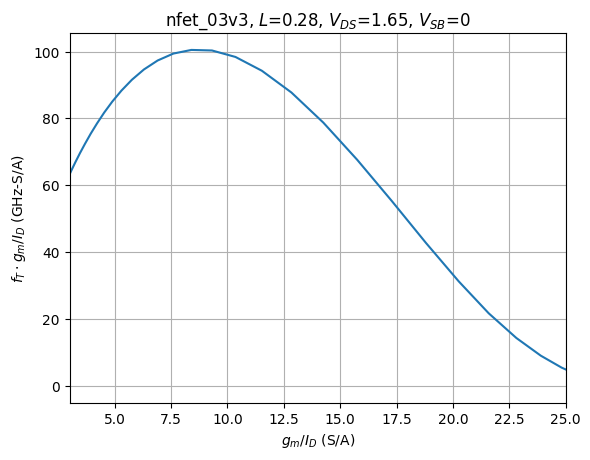

In [5]:
# plot product of gm/ID ant fT versus gm/ID
plt.plot(gm_id1, gm_id1*ft1/1e9)
plt.xlim(3, 25)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('$f_T\cdot g_m/I_D$ (GHz-S/A)')
plt.title(devices[choice]+', $L$='+str(L1)+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.grid()
plt.show()

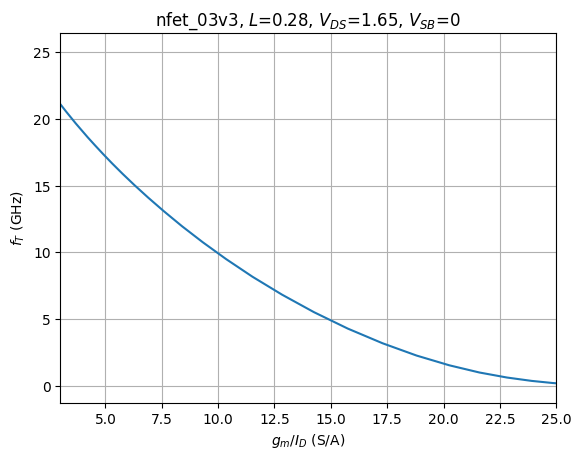

In [6]:
# plot fT versus gm/ID
plt.plot(gm_id1, ft1/1e9)
plt.xlim(3, 25)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('$f_T$ (GHz)')
plt.title(devices[choice]+', $L$='+str(L1)+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.grid()
plt.show()

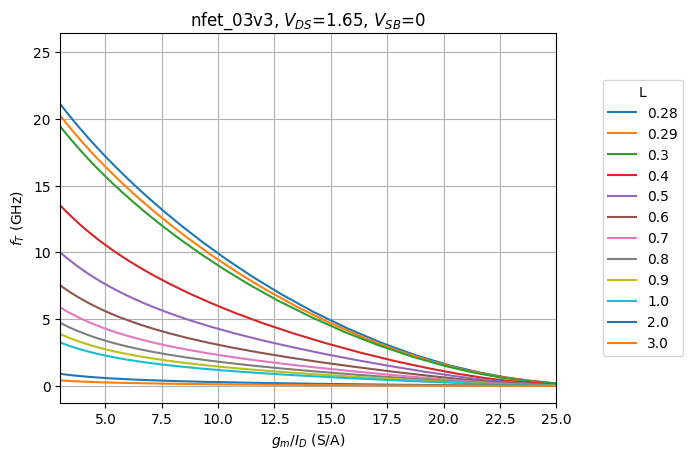

In [7]:
# plot fT versus gm/ID for all L
VDS2=0.9; VSB2=0
gm_id2 = fet.lookup('GM_ID', L=l, VDS=VDS1, VSB=VSB1)
ft2 = fet.lookup('GM_CGG', L=l, VDS=VDS1, VSB=VSB1)/2/np.pi

fig, ax = plt.subplots()
ax.plot(gm_id2.transpose(), ft2.transpose()/1e9)
ax.legend(loc='center right', bbox_to_anchor=(1.27, 0.5), title='L', labels=l.tolist())
plt.xlim(3, 25)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('$f_T$ (GHz)')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.grid()
plt.show()

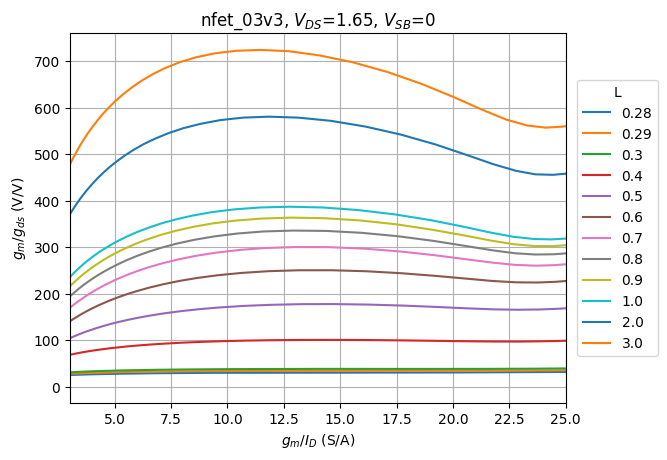

In [8]:
# plot gm/gds versus gm/ID for all L
gm_gds2 = fet.lookup('GM_GDS', L=l, VDS=VDS1, VSB=VSB1)

fig, ax = plt.subplots()
ax.plot(gm_id2.transpose(), gm_gds2.transpose())
ax.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), title='L', labels=l.tolist())
plt.xlim(3, 25)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('$g_m/g_{ds}$ (V/V)')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.grid()
plt.show()

<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_1870/3327652387.py:11: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('$J_D$ ($\mu$A/$\mu$m)')


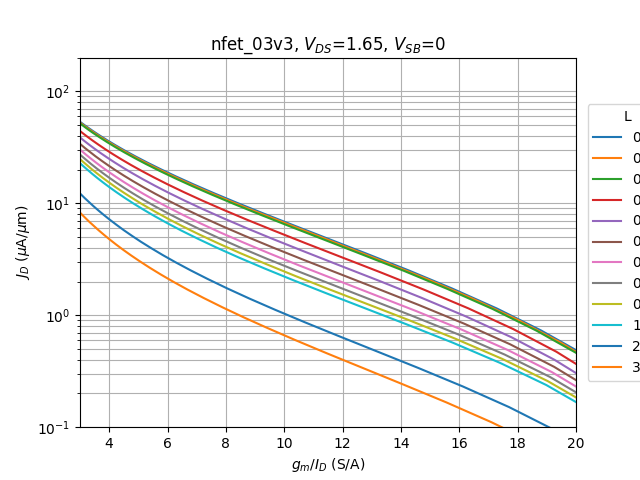

In [24]:
# plot jd versus gm/ID for all L
jd2 = fet.lookup('ID_W', L=l, VDS=VDS1, VSB=VSB1)/1e-6

fig, ax = plt.subplots()
ax.semilogy(gm_id2.transpose(), (jd2).transpose())
# ax.semilogy(gm_id2.transpose(), (jd2 / l[:, None]).transpose())
ax.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), title='L', labels=l.tolist())
plt.xlim(3, 20)
plt.ylim(0.1, 200)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('$J_D$ ($\mu$A/$\mu$m)')
plt.grid(which='minor')
plt.grid(which='major')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.show()

<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_1870/137130227.py:11: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('$I_D / (W/L)$ ($\mu$A)')


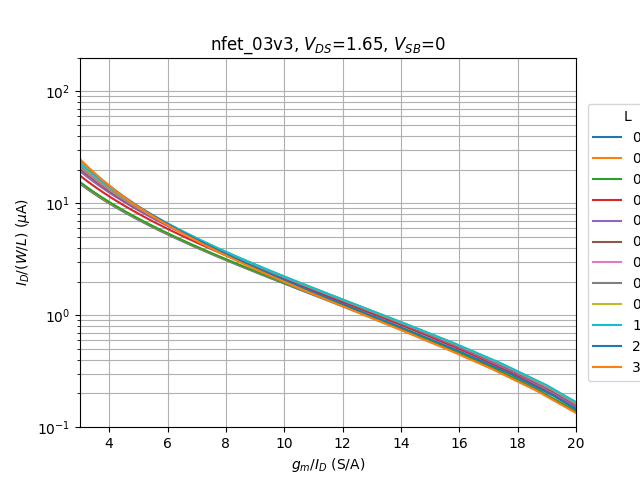

In [25]:
# plot jd versus gm/ID for all L
jd2 = fet.lookup('ID_W', L=l, VDS=VDS1, VSB=VSB1)/1e-6

fig, ax = plt.subplots()
# ax.semilogy(gm_id2.transpose(), (jd2).transpose())
ax.semilogy(gm_id2.transpose(), (jd2 * l[:, None]).transpose())
ax.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), title='L', labels=l.tolist())
plt.xlim(3, 20)
plt.ylim(0.1, 200)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('$I_D / (W/L)$ ($\mu$A)')
plt.grid(which='minor')
plt.grid(which='major')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.show()

<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_1870/2769872399.py:11: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('$I_D / (W/L)$ ($\mu$A)')


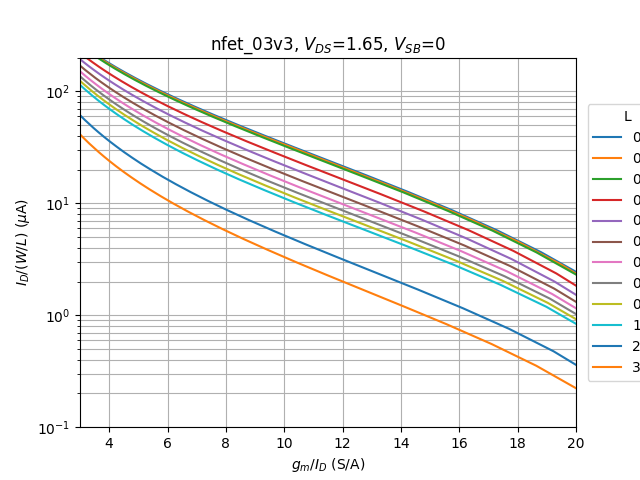

In [26]:
# plot jd versus gm/ID for all L
id = fet.lookup('ID', L=l, VDS=VDS1, VSB=VSB1)/1e-6

fig, ax = plt.subplots()
# ax.semilogy(gm_id2.transpose(), (jd2).transpose())
ax.semilogy(gm_id2.transpose(), id.transpose())
ax.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), title='L', labels=l.tolist())
plt.xlim(3, 20)
plt.ylim(0.1, 200)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('$I_D / (W/L)$ ($\mu$A)')
plt.grid(which='minor')
plt.grid(which='major')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.show()

In [13]:
whos


Variable   Type       Data/Info
-------------------------------
L1         float64    0.28
VDS1       float      1.65
VDS2       float      0.9
VSB1       int        0
VSB2       int        0
ax         Axes       Axes(0.125,0.11;0.775x0.77)
ax1        Axes       Axes(0.102973,0.128495;0.794991x0.840255)
ax2        Axes       Axes(0.102973,0.128495;0.794991x0.840255)
choice     int        0
color      str        tab:red
devices    list       n=2
fet        Lookup     <pygmid.Lookup.Lookup object at 0xffff3f606780>
fig        Figure     Figure(640x480)
ft1        ndarray    133: 133 elems, type `float64`, 1064 bytes
ft2        ndarray    12x133: 1596 elems, type `float64`, 12768 bytes
gm_gds2    ndarray    12x133: 1596 elems, type `float64`, 12768 bytes
gm_id1     ndarray    133: 133 elems, type `float64`, 1064 bytes
gm_id2     ndarray    12x133: 1596 elems, type `float64`, 12768 bytes
jd2        ndarray    12x133: 1596 elems, type `float64`, 12768 bytes
l          ndarray    12: 12 ele

In [15]:
jd2 / l[:, None]

array([[7.53571429e-07, 1.51357143e-06, 3.04071429e-06, ...,
        1.67357143e+03, 1.69000000e+03, 1.70714286e+03],
       [5.15931034e-07, 1.03655172e-06, 2.08206897e-06, ...,
        1.58689655e+03, 1.60344828e+03, 1.61931034e+03],
       [3.66466667e-07, 7.36666667e-07, 1.47933333e-06, ...,
        1.50800000e+03, 1.52333333e+03, 1.53866667e+03],
       ...,
       [4.69000000e-09, 9.42000000e-09, 1.89140000e-08, ...,
        2.29600000e+02, 2.31800000e+02, 2.34200000e+02],
       [1.83800000e-09, 3.69100000e-09, 7.40800000e-09, ...,
        6.79500000e+01, 6.86700000e+01, 6.93800000e+01],
       [1.00000000e-09, 2.00800000e-09, 4.03066667e-09, ...,
        3.19333333e+01, 3.22800000e+01, 3.26200000e+01]], shape=(12, 133))

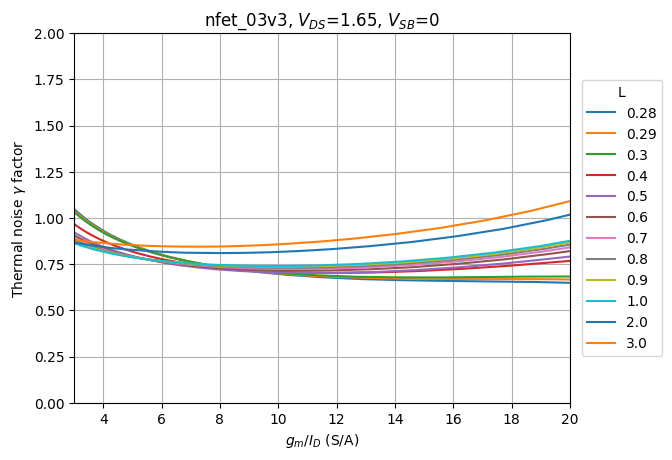

In [62]:
# plot gamma versus gm/ID for all L
gamma = fet.lookup('STH_GM', L=l, VDS=VDS1, VSB=VSB1) / (4*sc.Boltzmann*300)

fig, ax = plt.subplots()
ax.plot(gm_id2.transpose(), gamma.transpose())
ax.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), title='L', labels=l.tolist())
plt.xlim(3, 20)
plt.ylim(0, 2)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('Thermal noise $\gamma$ factor')
plt.grid(which='minor')
plt.grid(which='major')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.show()

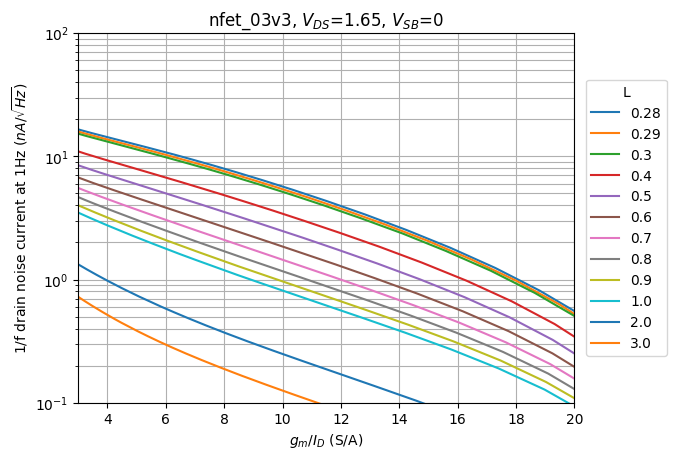

In [63]:
# plot flicker noise drain current at 1Hz versus gm/ID for all L
sfl = fet.lookup('SFL', L=l, VDS=VDS1, VSB=VSB1)**0.5

fig, ax = plt.subplots()
ax.semilogy(gm_id2.transpose(), sfl.transpose()/1e-9)
ax.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), title='L', labels=l.tolist())
plt.xlim(3, 20)
plt.ylim(0.1, 100)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('1/f drain noise current at 1Hz ($nA/ \sqrt{Hz}$)')
plt.grid(which='minor')
plt.grid(which='major')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.show()

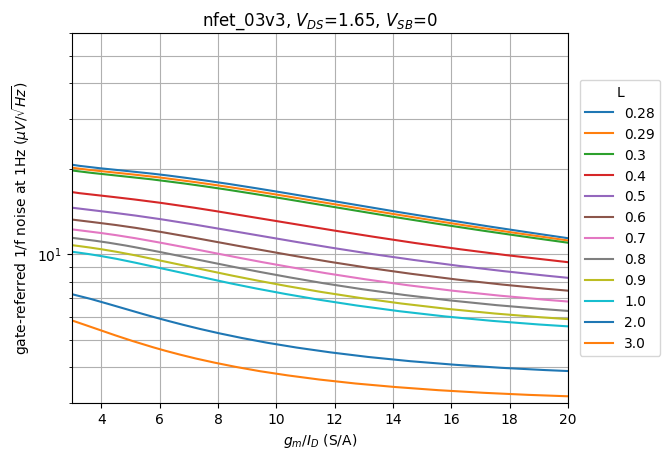

In [64]:
# plot gate-referred 1/f noise at 1Hz versus gm/ID for all L
sfl_gate = fet.lookup('SFL', L=l, VDS=VDS1, VSB=VSB1)**0.5 / fet.lookup('GM', L=l, VDS=VDS1, VSB=VSB1)

fig, ax = plt.subplots()
ax.semilogy(gm_id2.transpose(), sfl_gate.transpose()/1e-6)
ax.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), title='L', labels=l.tolist())
plt.xlim(3, 20)
plt.ylim(3, 60)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('gate-referred 1/f noise at 1Hz ($\mu V/ \sqrt{Hz}$)')
plt.grid(which='minor')
plt.grid(which='major')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.show()